PROJECT 05-01 基于LSB的数字图像水印算法
理解基于数字图像最低有效位LSB的数字图像水印算法的基本原理，编程实现并实验验证水印图像的
嵌入和提取算法。 

载体图像路径存在: True
水印图像路径存在: True
水印图像尺寸: (59, 200)
载体图像尺寸: (512, 512, 3)
水印嵌入位置: (156, 226)
水印尺寸: 200x59


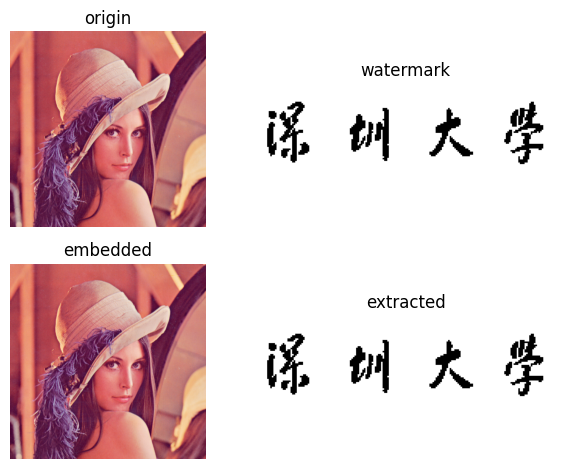

In [1]:
#!/usr/bin/python3 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

# 设置图像路径
root_path = '/root/DIVP_test/'
img_path = root_path + "project05/proj05_images/lena_std.bmp"
watermark_path = root_path + "project05/proj05_images/szu.bmp"

# 检查文件是否存在
print("载体图像路径存在:", os.path.exists(img_path))
print("水印图像路径存在:", os.path.exists(watermark_path))

def embed_watermark(cover_image_path, watermark_image_path, position=(0, 0)):
    # 加载载体图像和水印图像
    cover_image = cv2.imread(cover_image_path, cv2.IMREAD_COLOR)
    watermark = cv2.imread(watermark_image_path, cv2.IMREAD_GRAYSCALE)
 
    # 获取水印尺寸
    wm_height, wm_width = watermark.shape
    print(f"水印尺寸: {wm_width}x{wm_height}")
    
    # 确保水印不会超出载体图像边界
    x, y = position
    if x + wm_width > cover_image.shape[1] or y + wm_height > cover_image.shape[0]:
        raise ValueError("水印位置超出载体图像范围")
    
    # 增强水印的对比度
    watermark = cv2.normalize(watermark, None, 0, 255, cv2.NORM_MINMAX)
    _, binary_watermark = cv2.threshold(watermark, 127, 1, cv2.THRESH_BINARY)
    
    # 确保水印是清晰的黑白图像
    binary_watermark = binary_watermark.astype(np.uint8)
    
    # 创建输出图像的副本
    watermarked_image = cover_image.copy()
    
    # 嵌入水印到最低有效位
    for i in range(3):  # 对RGB三个通道都嵌入
        # 只在指定位置嵌入水印
        watermarked_image[y:y+wm_height, x:x+wm_width, i] = (
            (cover_image[y:y+wm_height, x:x+wm_width, i] & 254) | binary_watermark
        )
    
    return watermarked_image

def extract_watermark(embedded_image, watermark_size, position=(0, 0)):
    # 从指定位置提取水印
    x, y = position
    wm_height, wm_width = watermark_size
    
    # 提取最低有效位
    extracted_watermark = embedded_image[y:y+wm_height, x:x+wm_width, 0] & 1
    
    # 增强对比度
    extracted_watermark = extracted_watermark.astype(np.uint8) * 255
    _, extracted_watermark = cv2.threshold(extracted_watermark, 127, 255, cv2.THRESH_BINARY)
    
    return extracted_watermark

# 主程序
def main():
    # 读取原始水印图像并显示其尺寸
    watermark = cv2.imread(watermark_path, cv2.IMREAD_GRAYSCALE)
    watermark_size = watermark.shape
    print(f"水印图像尺寸: {watermark_size}")
    
    # 读取载体图像并显示其尺寸
    cover_image = cv2.imread(img_path, cv2.IMREAD_COLOR)
    print(f"载体图像尺寸: {cover_image.shape}")
    
    # 计算中心位置
    center_x = (cover_image.shape[1] - watermark_size[1]) // 2
    center_y = (cover_image.shape[0] - watermark_size[0]) // 2
    print(f"水印嵌入位置: ({center_x}, {center_y})")
    
    # 嵌入水印
    embedded_image = embed_watermark(img_path, watermark_path, position=(center_x, center_y))
    
    # 提取水印
    extracted_watermark = extract_watermark(embedded_image, watermark_size, position=(center_x, center_y))
    
    # 显示结果
    plt.figure()
    
    # 显示原始图像
    plt.subplot(221)
    plt.imshow(cv2.cvtColor(cover_image, cv2.COLOR_BGR2RGB))
    plt.title('origin')
    plt.axis('off')

    # 显示水印图像
    plt.subplot(222)
    plt.imshow(watermark, cmap='gray')
    plt.title('watermark')
    plt.axis('off')
    
    
    # 显示嵌入水印后的图像
    plt.subplot(223)
    plt.imshow(cv2.cvtColor(embedded_image, cv2.COLOR_BGR2RGB))
    plt.title('embedded')
    plt.axis('off')
    
    # 显示提取的水印
    plt.subplot(224)
    plt.imshow(extracted_watermark, cmap='gray')
    plt.title('extracted')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()




if __name__ == "__main__":
    main()